# fashion mnist

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

# Why we made Fashion-MNIST
The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

importing

In [82]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import datetime
from keras.layers import Input, Dense
from tensorflow.keras.layers import BatchNormalization, Flatten, Reshape, Conv2DTranspose, LeakyReLU, MaxPool2D
from keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
print(tf.__version__)

2.6.0


# Loading data 

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# preprocessing data and feature engineering

In [4]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3

In [8]:
batch_size = 128
num_classes = 10
epochs = 5

In [9]:
now = datetime.datetime.now

In [10]:
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

we define a function to call for the rest of the notebook to do the processing easier 

In [11]:
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    y_train =keras.utils.np_utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.np_utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    t = now()
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

# first model 
simple

In [12]:
feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

In [13]:
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

In [14]:
model = Sequential(feature_layers + classification_layers)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

In [16]:
train_model(model,(train_images,train_labels)
            ,(test_images,test_labels),
            num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 77s 162ms/step - loss: 2.2589 - accuracy: 0.1620 - val_loss: 2.2116 - val_accuracy: 0.2383
Epoch 2/5
469/469 [==============================] - 29s 63ms/step - loss: 2.1955 - accuracy: 0.2199 - val_loss: 2.1390 - val_accuracy: 0.3120
Epoch 3/5
469/469 [==============================] - 29s 62ms/step - loss: 2.1228 - accuracy: 0.2896 - val_loss: 2.0489 - val_accuracy: 0.4740
Epoch 4/5
469/469 [==============================] - 29s 62ms/step - loss: 2.0333 - accuracy: 0.3613 - val_loss: 1.9354 - val_accuracy: 0.5787
Epoch 5/5
469/469 [==============================] - 29s 62ms/step - loss: 1.9226 - accuracy: 0.4191 - val_loss: 1.7995 - val_accuracy: 0.6043
Training time: 0:03:17.210805
Test score: 1.7995078563690186
Test accuracy: 0.6043000221252441


# second

in this model we use transferf learning

In [17]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
x_train_lt5 = train_images[train_labels < 5]
y_train_lt5 = train_labels[train_labels < 5]
x_test_lt5 = test_images[test_labels < 5]
y_test_lt5 = test_labels[test_labels < 5]

x_train_gte5 = train_images[train_labels >= 5]
y_train_gte5 = train_labels[train_labels >= 5] - 5
x_test_gte5 = test_images[test_labels >= 5]
y_test_gte5 = test_labels[test_labels >= 5] - 5

In [18]:
feature_layers2 = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

classification_layers2 = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]
model2 = Sequential(feature_layers2 + classification_layers2)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [19]:
train_model(model2,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30000, 28, 28, 1)
30000 train samples
5000 test samples
Epoch 1/5
235/235 [==============================] - 15s 61ms/step - loss: 2.2823 - accuracy: 0.1736 - val_loss: 2.2496 - val_accuracy: 0.3456
Epoch 2/5
235/235 [==============================] - 14s 61ms/step - loss: 2.2214 - accuracy: 0.2572 - val_loss: 2.1755 - val_accuracy: 0.3872
Epoch 3/5
235/235 [==============================] - 15s 63ms/step - loss: 2.1378 - accuracy: 0.3005 - val_loss: 2.0717 - val_accuracy: 0.3950
Epoch 4/5
235/235 [==============================] - 15s 63ms/step - loss: 2.0269 - accuracy: 0.3256 - val_loss: 1.9301 - val_accuracy: 0.5104
Epoch 5/5
235/235 [==============================] - 15s 63ms/step - loss: 1.8846 - accuracy: 0.3458 - val_loss: 1.7682 - val_accuracy: 0.5616
Training time: 0:01:13.582295
Test score: 1.7681812047958374
Test accuracy: 0.5616000294685364


In [20]:
for l in feature_layers2:
    l.trainable = False

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [22]:
train_model(model2,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (30000, 28, 28, 1)
30000 train samples
5000 test samples
Epoch 1/5
235/235 [==============================] - 5s 22ms/step - loss: 2.0630 - accuracy: 0.2446 - val_loss: 1.9696 - val_accuracy: 0.3888
Epoch 2/5
235/235 [==============================] - 5s 21ms/step - loss: 1.9628 - accuracy: 0.2969 - val_loss: 1.8757 - val_accuracy: 0.4278
Epoch 3/5
235/235 [==============================] - 5s 22ms/step - loss: 1.8808 - accuracy: 0.3412 - val_loss: 1.7977 - val_accuracy: 0.5054
Epoch 4/5
235/235 [==============================] - 5s 21ms/step - loss: 1.8110 - accuracy: 0.3842 - val_loss: 1.7272 - val_accuracy: 0.5832
Epoch 5/5
235/235 [==============================] - 5s 21ms/step - loss: 1.7477 - accuracy: 0.4191 - val_loss: 1.6608 - val_accuracy: 0.6630
Training time: 0:00:25.656413
Test score: 1.6608127355575562
Test accuracy: 0.6629999876022339


# CNN

In [23]:
model_c = Sequential()
model_c.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_c.add(MaxPooling2D((2, 2)))
model_c.add(Flatten())
model_c.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model_c.add(Dense(10, activation='softmax'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model_c.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model_c.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [25]:
train_model(model_c,(train_images,train_labels)
            ,(test_images,test_labels),
            num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 10s 20ms/step - loss: 2.3578 - accuracy: 0.2287 - val_loss: 1.7471 - val_accuracy: 0.4752
Epoch 2/5
469/469 [==============================] - 9s 20ms/step - loss: 1.4520 - accuracy: 0.5758 - val_loss: 1.2472 - val_accuracy: 0.6334
Epoch 3/5
469/469 [==============================] - 9s 19ms/step - loss: 1.1243 - accuracy: 0.6671 - val_loss: 1.0397 - val_accuracy: 0.6808
Epoch 4/5
469/469 [==============================] - 10s 21ms/step - loss: 0.9662 - accuracy: 0.7061 - val_loss: 0.9194 - val_accuracy: 0.7174
Epoch 5/5
469/469 [==============================] - 9s 20ms/step - loss: 0.8678 - accuracy: 0.7358 - val_loss: 0.8427 - val_accuracy: 0.7395
Training time: 0:00:46.859397
Test score: 0.8427396416664124
Test accuracy: 0.7394999861717224


# improved cnn

In [26]:
model_b = Sequential()
model_b.add(Conv2D(32, (3, 3),padding='same' ,activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_b.add(MaxPooling2D((2, 2)))
model_b.add(Flatten())
model_b.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model_b.add(Dense(10, activation='softmax'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model_b.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model_b.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               627300    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 628,630
Trainable params: 628,630
Non-trainable params: 0
_________________________________________________________________


In [28]:
train_model(model_b,(train_images,train_labels)
            ,(test_images,test_labels),
            num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 11s 23ms/step - loss: 2.0190 - accuracy: 0.3082 - val_loss: 1.6323 - val_accuracy: 0.5865
Epoch 2/5
469/469 [==============================] - 11s 23ms/step - loss: 1.3953 - accuracy: 0.6357 - val_loss: 1.2283 - val_accuracy: 0.6580
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 1.1145 - accuracy: 0.6786 - val_loss: 1.0376 - val_accuracy: 0.6928
Epoch 4/5
469/469 [==============================] - 11s 23ms/step - loss: 0.9645 - accuracy: 0.7146 - val_loss: 0.9230 - val_accuracy: 0.7238
Epoch 5/5
469/469 [==============================] - 11s 23ms/step - loss: 0.8678 - accuracy: 0.7435 - val_loss: 0.8431 - val_accuracy: 0.7461
Training time: 0:00:54.121326
Test score: 0.843070924282074
Test accuracy: 0.7461000084877014


# another one

In [29]:
model_d = Sequential()
model_d.add(Conv2D(64, (3, 3),padding='same' ,activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_d.add(MaxPooling2D((2, 2)))
model_d.add(Flatten())
model_d.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model_d.add(Dense(10, activation='softmax'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model_d.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model_d.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               1254500   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 1,256,150
Trainable params: 1,256,150
Non-trainable params: 0
_________________________________________________________________


In [31]:
train_model(model_d,(train_images,train_labels)
            ,(test_images,test_labels),
            num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 19s 40ms/step - loss: 1.7329 - accuracy: 0.4749 - val_loss: 1.3246 - val_accuracy: 0.6389
Epoch 2/5
469/469 [==============================] - 18s 39ms/step - loss: 1.1180 - accuracy: 0.6842 - val_loss: 0.9844 - val_accuracy: 0.7064
Epoch 3/5
469/469 [==============================] - 19s 39ms/step - loss: 0.8905 - accuracy: 0.7402 - val_loss: 0.8346 - val_accuracy: 0.7483
Epoch 4/5
469/469 [==============================] - 19s 39ms/step - loss: 0.7755 - accuracy: 0.7711 - val_loss: 0.7481 - val_accuracy: 0.7712
Epoch 5/5
469/469 [==============================] - 19s 40ms/step - loss: 0.7034 - accuracy: 0.7896 - val_loss: 0.6913 - val_accuracy: 0.7865
Training time: 0:01:33.297603
Test score: 0.6912522912025452
Test accuracy: 0.7864999771118164


# autoencoder

In [32]:
x_train_flat = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
x_test_flat = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))
print(x_train_flat.shape)
print(x_test_flat.shape)

(60000, 784)
(10000, 784)


In [33]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler().fit(x_train_flat)
x_train_scaled = s.transform(x_train_flat)

In [34]:
ENCODING_DIM = 64

inputs = Input(shape=(784,)) 
encoded = Dense(ENCODING_DIM, activation="relu")(inputs)
encoder_model = Model(inputs, encoded, name='encoder')


encoded_inputs = Input(shape=(ENCODING_DIM,), name='encoding')
reconstruction = Dense(784, activation="sigmoid")(encoded_inputs)
decoder_model = Model(encoded_inputs, reconstruction, name='decoder')


outputs = decoder_model(encoder_model(inputs))
full_model = Model(inputs, outputs, name='full_ae')

In [35]:
full_model = Model(inputs=inputs, 
                   outputs=outputs)

full_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [36]:
history = full_model.fit(x_train_flat, x_train_flat, shuffle=True, epochs=1, batch_size=32)

1875/1875 [==============================] - 2s 1ms/step - loss: -377611264.0000 - accuracy: 0.0042


we performed poorly here will improve soon

In [37]:
ENCODING_DIM = 34
HIDDEN_DIM = 256



inputs = Input(shape=(784,)) 
encoded = Dense(ENCODING_DIM, activation="relu")(inputs)
encoder_hidden = Dense(HIDDEN_DIM, activation="sigmoid")(encoded)
encoder_model = Model(inputs, encoded, name='encoder')



encoded_inputs = Input(shape=(ENCODING_DIM,), name='encoding')
decoder_hidden = Dense(HIDDEN_DIM, activation="relu")(encoded_inputs)
reconstruction = Dense(784, activation="sigmoid")(decoder_hidden)
decoder_model = Model(encoded_inputs, reconstruction, name='decoder')



outputs = decoder_model(encoder_model(inputs))
full_model = Model(inputs, outputs, name='full_ae')

In [38]:
full_model = Model(inputs=inputs, 
                   outputs=outputs)

full_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [39]:
history = full_model.fit(x_train_flat, x_train_flat, shuffle=True, epochs=2, batch_size=32)

Epoch 1/2
1875/1875 [==============================] - 3s 2ms/step - loss: -52762918912.0000 - accuracy: 0.0016
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: -740490608640.0000 - accuracy: 0.0016


In [40]:
def mse_reconstruction(true, reconstructed):
    return np.sum(np.power(true - reconstructed, 2) / true.shape[1])

In [41]:
decoded_images = full_model.predict(x_test_flat)
mse_reconstruction(decoded_images, x_test_flat)

decoded_images = full_model.predict(x_test_flat)
mse_reconstruction(decoded_images, x_test_flat)

132823060.0

In [42]:
def train_ae_epochs(num_epochs=1):
    ENCODING_DIM = 32
    HIDDEN_DIM = 256

    inputs = Input(shape=(784,)) 
    encoded = Dense(ENCODING_DIM, activation="relu")(inputs)
    encoder_hidden = Dense(HIDDEN_DIM, activation="sigmoid")(encoded)
    encoder_model = Model(inputs, encoded, name='encoder')

    encoded_inputs = Input(shape=(ENCODING_DIM,), name='encoding')
    decoder_hidden = Dense(HIDDEN_DIM, activation="relu")(encoded_inputs)
    reconstruction = Dense(784, activation="sigmoid")(decoder_hidden)
    decoder_model = Model(encoded_inputs, reconstruction, name='decoder')

    outputs = decoder_model(encoder_model(inputs))
    full_model = Model(inputs, outputs, name='full_ae')
    
    full_model = Model(inputs=inputs, 
                       outputs=outputs)

    full_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
    mse_res = []
    for i in range(num_epochs):
        history = full_model.fit(x_train_flat, x_train_flat, shuffle=True, epochs=1, batch_size=32)
    
        decoded_images = full_model.predict(x_test_flat)
        reconstruction_loss = mse_reconstruction(decoded_images, x_test_flat)
        mse_res.append(reconstruction_loss)
        print("Reconstruction loss after epoch {0} is {1}"
              .format(i+1, reconstruction_loss))
    return mse_res


In [43]:
train_ae_epochs(5)

1875/1875 [==============================] - 4s 2ms/step - loss: -51357528064.0000 - accuracy: 0.0011
Reconstruction loss after epoch 1 is 132823048.0
1875/1875 [==============================] - 4s 2ms/step - loss: -732233203712.0000 - accuracy: 0.0011
Reconstruction loss after epoch 2 is 132823088.0
1875/1875 [==============================] - 4s 2ms/step - loss: -3106702622720.0000 - accuracy: 0.0011
Reconstruction loss after epoch 3 is 132823216.0
1875/1875 [==============================] - 4s 2ms/step - loss: -8283035795456.0000 - accuracy: 0.0011
Reconstruction loss after epoch 4 is 132823160.0
1875/1875 [==============================] - 4s 2ms/step - loss: -17332195819520.0000 - accuracy: 0.0011
Reconstruction loss after epoch 5 is 132823064.0


[132823050.0, 132823090.0, 132823220.0, 132823160.0, 132823064.0]

In [44]:
full_model_2 = Model(inputs=inputs, 
                   outputs=outputs)

full_model_2.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [45]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [65]:
history = full_model_2.fit(x_train_flat, x_train_flat, shuffle=True, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: -79196613246976.0000 - accuracy: 0.0015
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: -114881407746048.0000 - accuracy: 0.0015
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: -159983572353024.0000 - accuracy: 0.0015
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: -215495420674048.0000 - accuracy: 0.0015
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: -282465839087616.0000 - accuracy: 0.0015


In [47]:
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 8)           0   

In [59]:
x_train = train_images.astype('float32')
x_test = test_images.astype('float32')
x_train /= 255
x_test /= 255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test),28, 28, 1))

In [50]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/10
469/469 [==============================] - 31s 65ms/step - loss: 0.3521 - accuracy: 0.5006 - val_loss: 0.3082 - val_accuracy: 0.5004
Epoch 2/10
469/469 [==============================] - 31s 65ms/step - loss: 0.3012 - accuracy: 0.5040 - val_loss: 0.2994 - val_accuracy: 0.5021
Epoch 3/10
469/469 [==============================] - 31s 65ms/step - loss: 0.2953 - accuracy: 0.5050 - val_loss: 0.2954 - val_accuracy: 0.5029
Epoch 4/10
469/469 [==============================] - 31s 66ms/step - loss: 0.2922 - accuracy: 0.5055 - val_loss: 0.2932 - val_accuracy: 0.5037
Epoch 5/10
469/469 [==============================] - 31s 66ms/step - loss: 0.2902 - accuracy: 0.5058 - val_loss: 0.2912 - val_accuracy: 0.5039
Epoch 6/10
469/469 [==============================] - 31s 66ms/step - loss: 0.2886 - accuracy: 0.5061 - val_loss: 0.2897 - val_accuracy: 0.5040
Epoch 7/10
469/469 [==============================] - 31s 66ms/step - loss: 0.2873 - accuracy: 0.5062 - val_loss: 0.2887 - val_accuracy:

back on track

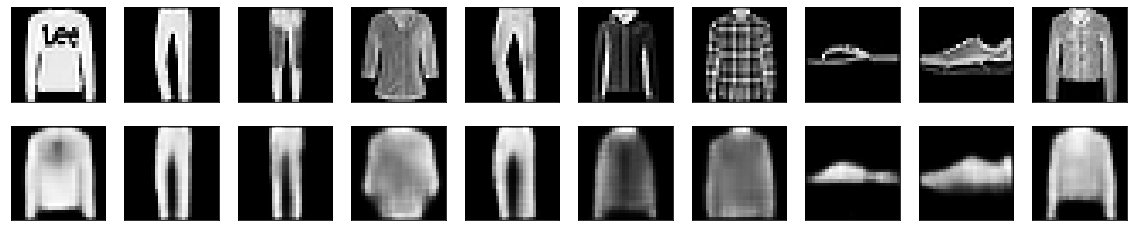

In [51]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

i showed what the autoencoder will make 

In [90]:
inputs = Input(shape=(28, 28, 1), name="inputs")
x = inputs
x = Conv2D(32, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)

x = Conv2D(64, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)


x = Flatten()(x)
units = x.shape[1]
x = Dense(128, name="latent")(x)
x = Dense(units)(x)
x = LeakyReLU(alpha=0.2)(x)
x = Reshape((7, 7, 64))(x)


x = Conv2DTranspose(64, (3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)

x = Conv2DTranspose(1, (3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("sigmoid", name="outputs")(x)

outputs = x

autoencoder_2 = Model(inputs, outputs)
autoencoder_2.compile(optimizer=Adam(1e-3), loss='binary_crossentropy',metrics=['accuracy'])
autoencoder_2.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_17 (Batc (None, 14, 14, 64)        256

In [91]:
autoencoder_2.fit(
    x_train,
    x_train,
    epochs=20,
    batch_size=256,
    shuffle=False,
    validation_data=(x_test, x_test)
)

Epoch 1/20
235/235 [==============================] - 54s 228ms/step - loss: 0.4612 - accuracy: 0.4932 - val_loss: 0.4993 - val_accuracy: 0.5032
Epoch 2/20
235/235 [==============================] - 54s 231ms/step - loss: 0.3889 - accuracy: 0.5077 - val_loss: 0.3814 - val_accuracy: 0.5065
Epoch 3/20
235/235 [==============================] - 54s 231ms/step - loss: 0.3510 - accuracy: 0.5089 - val_loss: 0.3385 - val_accuracy: 0.5070
Epoch 4/20
235/235 [==============================] - 53s 225ms/step - loss: 0.3266 - accuracy: 0.5093 - val_loss: 0.3206 - val_accuracy: 0.5071
Epoch 5/20
235/235 [==============================] - 49s 207ms/step - loss: 0.3098 - accuracy: 0.5095 - val_loss: 0.3105 - val_accuracy: 0.5071
Epoch 6/20
235/235 [==============================] - 51s 219ms/step - loss: 0.2978 - accuracy: 0.5096 - val_loss: 0.3005 - val_accuracy: 0.5073
Epoch 7/20
235/235 [==============================] - 55s 233ms/step - loss: 0.2889 - accuracy: 0.5097 - val_loss: 0.2898 - val_ac

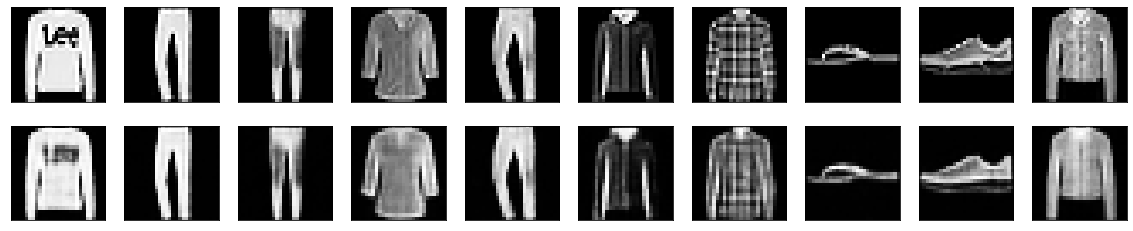

In [87]:
decoded_imgs = autoencoder_2.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

the last one was the best model and we can see why

we recommend either our improved cnn model and or autoencoder_2

# summary and key finding
after this notebook i realized the Architecture for the layers is the most important part of NN models and we can have really diffrent outcomes 

# suggestions for next step
my suggestion is using cnn autoencoders are really good and we get really high accuracy 
another thing is finding the right way to set up layers is really important 
my suggestion is to spend time and grind our way to become good at nn